In [2]:
import requests, time, sys, pickle
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [12]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [9]:
# stack overflow solution for waiting until page is fully loaded
def scroll_down(driver, value):
    driver.execute_script("window.scrollBy(0,"+str(value)+")")

# Scroll down the page
def wait_for_page_load(driver):
    old_page = driver.page_source
    while True:
        scroll_down(driver, 2000)
        time.sleep(2)
        new_page = driver.page_source
        if new_page != old_page:
            print("Page still loading...")
            old_page = new_page
        else:
            print("Page fully loaded!\n")
            break
    return True

In [10]:
# download all pages with beer on them

soup_list = []

chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)

# 4639 beers in total / 15 per page = 310
for page in range(1, 311):
    print(f"Iteration: {page} of 310")
    url = f"https://www.systembolaget.se/sok/?categoryLevel1=%C3%96l&page={page}"
    driver.get(url)
    wait_for_page_load(driver)
    get = driver.page_source
    soup = bs(get, "lxml")
    soup_list.append(soup)
    
driver.close()



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [/Users/ivenwinkelmann/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


Iteration: 1 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 2 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 3 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 4 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 5 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 6 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 7 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 8 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 9 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 10 of 310
Page still loading...
Pag

Page fully loaded!

Iteration: 78 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 79 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 80 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 81 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 82 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 83 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 84 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 85 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 86 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 87 of 

Iteration: 154 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 155 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 156 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 157 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 158 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 159 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 160 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 161 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 162 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 163 of 310
Page s

Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 231 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 232 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 233 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 234 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 235 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 236 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 237 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 238 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 239 of 310
Page still loading...
Page s

Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 307 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 308 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 309 of 310
Page still loading...
Page still loading...
Page still loading...
Page fully loaded!

Iteration: 310 of 310
Page still loading...
Page fully loaded!



In [16]:
# pickle the soup list to avoid doing above thing again. just in case
sys.setrecursionlimit(30000)
save_object(soup_list, "soup_list.pkl")
sys.setrecursionlimit(1000)

In [17]:
# generate list of entries (containers)

entry_key = "div.css-1d0nbku.e3v8jw35"

entry_list = []
for soup in soup_list:
    entry_list += soup.select(entry_key)

entry_list = flatten(entry_list)

In [19]:
sys.setrecursionlimit(30000)
save_object(entry_list, "entry_list.pkl")
sys.setrecursionlimit(1000)

In [98]:
with open("entry_list.pkl", "rb") as f:
    entry_list = pickle.load(f)

In [8]:
keys = {
    "brewery": "span.css-5iy4yn.eyx2bd72"
    , "name": ".css-zqwl4t.eyx2bd70"
    , "description": "h4.css-fpgueq.eyx2bd74"
    , "origin": ".css-1d8bsg1 > span:nth-child(2)"
    , "volume_ml": ".css-n787wr:nth-child(2)" 
    , "price": ".css-fb2rsy"
    , "bitterness": "div.css-1dho28n.e1n8igs03 > div > div:nth-child(1) > div > svg"
    , "body": "div.css-1dho28n.e1n8igs03 > div > div:nth-child(2) > div > svg"
    , "sweetness": "div.css-1dho28n.e1n8igs03 > div > div:nth-child(3) > div > svg"
    , "recommendation": "div.css-a7i31h"
}

In [99]:
# extract data out of every container and generate data frames

pd_dct = {i: [] for i in keys}

for entry in entry_list:
    for cat, key in keys.items():
        if cat in ["bitterness", "body", "sweetness"]:
            try:
                pd_dct[cat].append(entry.select(key)[0].get("type"))
            except:
                pd_dct[cat].append(np.nan)
        
        else:
            try:
                pd_dct[cat].append(entry.select(key)[0].text)
            except:
                pd_dct[cat].append(np.nan)
    
# pd_dct
df = pd.DataFrame(pd_dct)
df = df[df.brewery.notna()]
df.reset_index(inplace=True)

In [100]:
df2 = df.copy()

# clean data frame
#format brewery
df2.brewery = df2.brewery.str.lower()

# format name
# df2.name.fillna(df2.brewery, inplace=True)
df2.name = df2.name.str.lower().str.strip()

# format origin
df2.origin = df2.origin.str.lower()

# format description
df2.description = df2.description.str.lower()
pattern = r"(\b[\w\/ ]+\b)"
df2 = df2.join(df2.description.str.extractall(pattern)[0].unstack())
df2.drop(columns=["description", 0, 3, 4], inplace=True)
df2.rename(columns={1: "cat_1", 2: "cat_2"}, inplace=True)

# format volume_ml
df2.volume_ml = pd.to_numeric(df2.volume_ml.str.replace(" ml", ""), errors="coerce")

# format price
df2.price = pd.to_numeric(df2.price.str.replace(":", ".").str.replace("*", "").str.replace("-", ""), errors="coerce")


# format tastes
df2.bitterness = pd.to_numeric(df2.bitterness.str.replace("taste-clock-", ""), errors="coerce")

df2.body = pd.to_numeric(df2.body.str.replace("taste-clock-", ""), errors="coerce" )

df2.sweetness = pd.to_numeric(df2.sweetness.str.replace("taste-clock-", ""), errors="coerce")


# format recommendation
# try:
#     pattern = r"((?<=till )[\wöä]*$|(?<=till )[\wöä]*(?=P))"
#     df = df.join(df.recommendation.str.extractall(pattern)[0].unstack())
# except:
#     pass
# df.drop(columns="recommendation", inplace=True)

# df.rename(columns={0: "rec_1", 1: "rec_2", 2: "rec_3", 3: "rec_4", }, inplace=True)

df2.drop(columns="index", inplace=True)

# calculate new data
df2["price/100_ml"] = df2.price / df2.volume_ml * 100

<ipython-input-100-d27b568737cf>:25: FutureWarning:The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [101]:
df2.to_csv("df.csv")

# FIGURE TIME

In [110]:
df2

,brewery,name,origin,volume_ml,price,bitterness,body,sweetness,recommendation,cat_1,cat_2,price/100_ml
0,harpoon,big league,usa,355.0,26.9,6.0,8.0,3.0,Passar till fläskPassar till lammPassar till n...,ale,imperial/dubbel ipa,7.577465
1,barlingbo bryggeri,galgbacken,sverige,330.0,14.9,7.0,6.0,2.0,Passar till lammPassar till fläskPassar till s...,ale,india pale ale,4.515152
2,holba horska,NaN,tjeckien,330.0,9.4,6.0,6.0,2.0,Passar till fläskPassar till lammPassar till s...,ljus lager,pilsner,2.848485
3,founders solid gold,NaN,usa,355.0,16.9,5.0,5.0,2.0,Passar till fiskPassar till fläskPassar till g...,ljus lager,internationell stil,4.760563
4,newcastle brown ale,NaN,storbritannien,330.0,16.9,5.0,5.0,2.0,Passar till fläskPassar till grönsakerPassar t...,ale,brown ale,5.121212
...,...,...,...,...,...,...,...,...,...,...,...,...
4634,beirut beer,NaN,libanon,330.0,21.9,NaN,NaN,NaN,NaN,ljus lager,internationell stil,6.636364
4635,cucapá,chubacabra pale ale,mexiko,355.0,27.2,NaN,NaN,NaN,NaN,ale,amerikansk pale ale,7.661972
4636,guldkällan,NaN,sverige,500.0,14.3,NaN,NaN,NaN,NaN,ljus lager,internationell stil,2.860000
4637,mölska bergslagen,NaN,sverige,330.0,48.6,3.0,5.0,4.0,Passar till fläskPassar till lammPassar till s...,annan öl,NaN,14.727273


In [102]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'24',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

In [103]:
fig_size = (8,6)
font = {'fontname': 'monospace'}
color = "#F6C101"

def fig_aest():
    plt.figure(figsize=fig_size)
    plt.xticks(**font, fontweight='bold')
    plt.yticks(**font, fontweight='bold')
    plt.xlabel("Count", **font)
    plt.ylabel("", **font)
    plt.title("", **font)

Text(0.5, 0, 'Count')

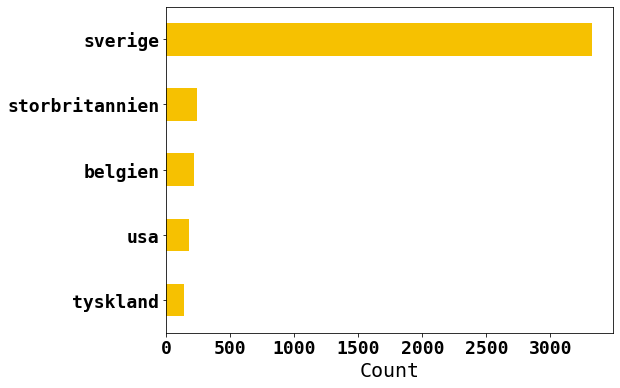

In [273]:
# fig_df = df2.origin.value_counts().sort_values(ascending=True)[df2.origin.value_counts() > (len(df2)/100)]
fig_df = df2.origin.value_counts().nlargest(5).sort_values(ascending=True)
fig_aest()
fig_df.plot(kind="barh", color=color)
plt.xlabel("Count")


Text(0, 0.5, 'Brewery')

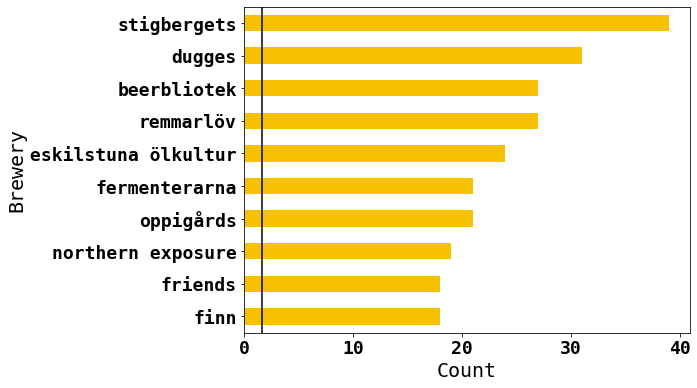

In [104]:
mean = df.brewery.value_counts().mean()
fig_aest()
plt.plot(np.ones(50) * mean, range(-10,40), color="black")
df2.brewery.value_counts().nlargest(10).sort_values(ascending=True).plot(kind="barh", color=color)
plt.xlabel("Count")
plt.ylabel("Brewery")

Text(0, 0.5, 'Volume (ml)')

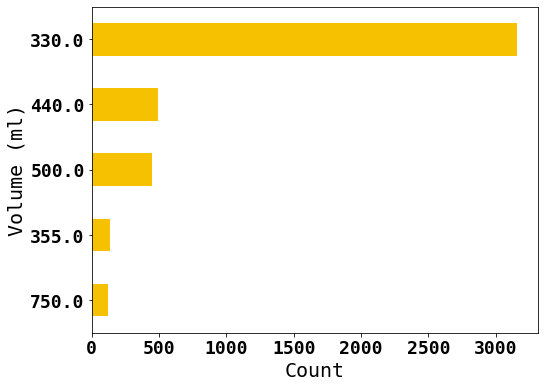

In [278]:
fig_aest()
df2.volume_ml.value_counts().nlargest(5).sort_values(ascending=True).plot(kind="barh", color=color)
plt.xlabel("Count")
plt.ylabel("Volume (ml)")

Text(0.5, 0, 'Count')

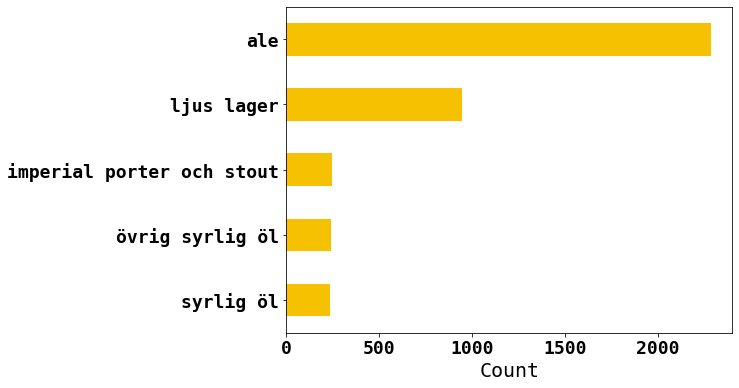

In [280]:
fig_aest()
df2.cat_1.value_counts().nlargest(5).sort_values(ascending=True).plot(kind="barh", color=color)
plt.xlabel("Count")

Text(0.5, 1.0, 'ale')

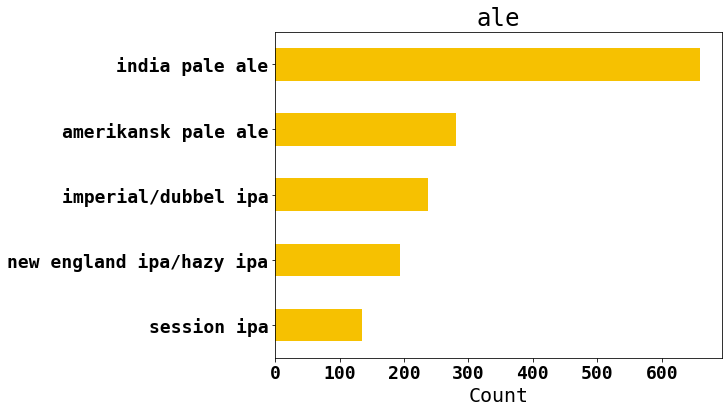

In [301]:
fig_aest()
df2[df2.cat_1 == "ale"].cat_2.value_counts().nlargest(5).sort_values(ascending=True).plot(kind="barh", color=color)
plt.xlabel("Count")
plt.title("ale")

Text(0.5, 1.0, 'ljus lager')

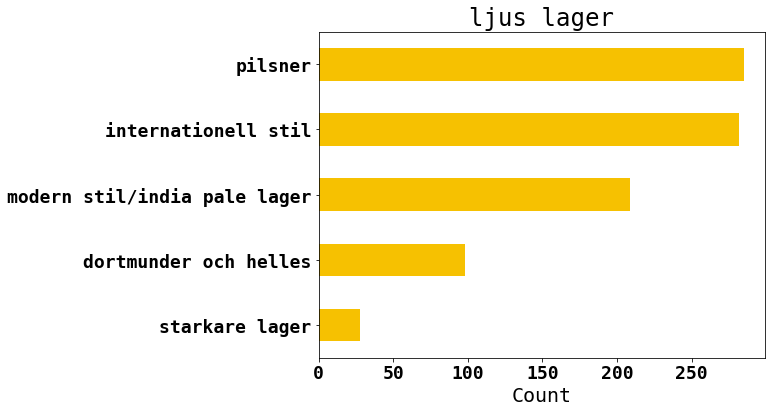

In [300]:
fig_aest()
df2[df2.cat_1 == "ljus lager"].cat_2.value_counts().nlargest(5).sort_values(ascending=True).plot(kind="barh", color=color)
plt.title("ljus lager")

Text(0.5, 1.0, 'IPA')

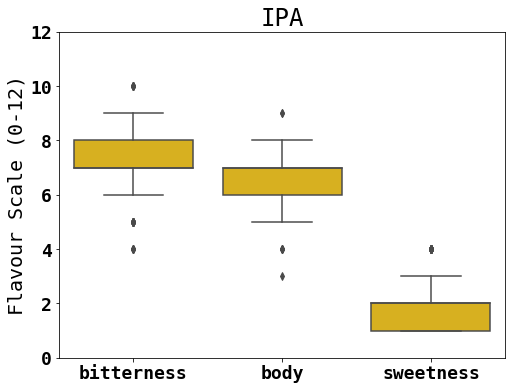

In [298]:
fig_aest()
fig_df = df2[df2.cat_2 == "india pale ale"][["bitterness", "body", "sweetness"]]
sns.boxplot(data = fig_df, color=color).set(ylim=(0,12))
plt.xlabel('')
plt.ylabel("Flavour Scale (0-12)")
plt.title("IPA")

Text(0.5, 1.0, 'Pilsner')

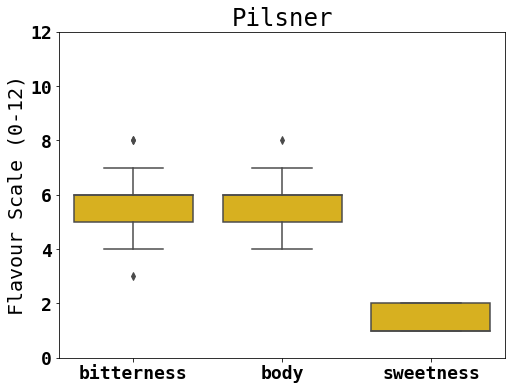

In [297]:
fig_aest()
fig_df = df2[df2.cat_2 == "pilsner"][["bitterness", "body", "sweetness"]]
sns.boxplot(data = fig_df, color=color).set(ylim=(0,12))
plt.xlabel('')
plt.ylabel("Flavour Scale (0-12)")
plt.title("Pilsner")